## Finally able to do some modelling

In [74]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
#import diagnostic_plots

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV


%matplotlib inline
#note to self, i want all the songs without any weeks because that means those are unpopular songs which are important!
#sm.OLS(y_values, sm.add_constant(x_values)).fit().summary()


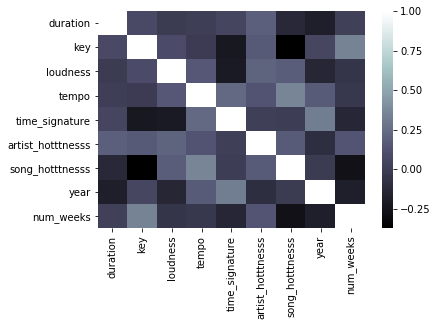

In [75]:
df = pd.read_pickle('kaggled_merged_with_billboard.pkl')
#print(df.columns)

#need to figure out what 'key' is supposed to represent
#I think it would be a good idea to get a visual plot

#pairplot only works with float and int values, so i need to make sure if i have any strings present in the data set
df.corr()
sns.heatmap(df.corr(), cmap = 'bone')


#sns.pairplot(df, size = 1.2, aspect=1.5);

In [76]:
#modeling with statsmodels

sm.OLS(df.num_weeks, sm.add_constant(df.key)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_weeks   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.479
Date:                Fri, 13 Jul 2018   Prob (F-statistic):            0.00300
Time:                        07:08:10   Log-Likelihood:                -265.50
No. Observations:                  70   AIC:                             535.0
Df Residuals:                      68   BIC:                             539.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6706      2.181      6.268      0.000       9.318      18.023
key            0.9923      0.322      3.079      0.003       0.349       1.635
==============================================================================
Omnibus:                        2.017   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.715
Skew:                           0.383   Prob(JB):                        0.424
Kurtosis:                       2.968   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
def plot_predict_and_points(x_values, y_values, model):
    y_predict = model.predict(x_values)

    plt.plot(x_values[:,0], y_values, 'ro')
    plt.plot(x_values[:,0], y_predict, 'b--')
    plt.xlabel('x')
    plt.ylabel('y')
    
#plot_predict_and_points(x_values, y_values, linear_model)
#plt.title('This IS the line that best fits the data');

/Users/jennwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/jennwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jennwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


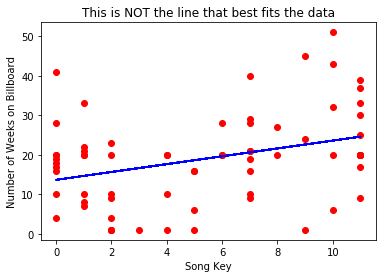

In [78]:
linear_model = LinearRegression()
linear_model.fit(df.key.reshape(-1,1), df.num_weeks)
linear_model.score(df.key.reshape(-1,1), df.num_weeks)

plot_predict_and_points(df.key.reshape(-1,1), df.num_weeks, linear_model)
plt.title('This is NOT the line that best fits the data');
plt.xlabel('Song Key');
plt.ylabel('Number of Weeks on Billboard');

In [80]:
#print(df.columns)
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('num_weeks' ~ 'duration' + 'key' + 'loudness' + 'tempo' +  'time_signature' + 
                        'artist_hotttnesss' +  'artist_location' + 'Artist' + 'genre' + 
                       'song_hotttnesss' + 'Song' + 'year', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

SyntaxError: invalid syntax (<ipython-input-80-45b4d4e07b32>, line 3)